In [1]:
import praw
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
with open("config.json", "r") as jsonfile:
    data = json.load(jsonfile)  # Reading the config file
#     print("Config data read successful", data)

In [3]:
from collections import namedtuple  # Each element will be assigned a field
import sys
from pyspark import SparkContext, SparkConf
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession,SQLContext
# Allow us to order things in decscending order
from pyspark.sql.functions import desc

# create spark configuration
conf = SparkConf()
conf.setAppName("RedditStreamApp")
# create spark context with the above configuration
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")
# create the Streaming Context from the above spark context with interval size 10 seconds
ssc = StreamingContext(sc, 10)
# setting a checkpoint to allow RDD recovery
####ssc.checkpoint("checkpoint_RedditApp")
# read data from port 5590
# socket_stream = ssc.socketTextStream("localhost", 5590)


# sc = SparkContext() # Establish an entry point of Apache Spark functionality.
# ssc = StreamingContext(sc, 10) # Create streaming context with intervals of 10 seconds.
sqlContext = SQLContext(sc) # Initialising Spark SQL functionalities.

socket_stream = ssc.socketTextStream("127.0.0.1", 5590)


C:\Users\marke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\streaming\context.py:72: FutureWarning: DStream is deprecated as of Spark 3.4.0. Migrate to Structured Streaming.
  warnings.warn(
C:\Users\marke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
### Modify the code here to match your logic in reddit_producer.py
lines = socket_stream.window(20)
fields = ("author",'date','time','words')
RedditComment = namedtuple('RedditComment', fields)


In [5]:
x_times = []
y_avgs = []

In [6]:
def get_sql_context_instance(spark_context):
    if ('sqlContextSingletonInstance' not in globals()):
        globals()['sqlContextSingletonInstance'] = SQLContext(spark_context)
    return globals()['sqlContextSingletonInstance']


def test_content(string):
    print(string)
    return eval(string)

def get_average(x):
    total = sum(x)
    length = len(x)
    return int(total / length)

def plot_avg(x, y):
    window_size = 20
    start_idx = max(0, len(x_times) - window_size)
    
    ax.clear()
    ax.plot(x_times[start_idx:], y_avgs[start_idx:], label="Average Unique words per comment 10(s)")

    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)


def process_rdd(time, rdd):
    print("----------- %s -----------" % str(time))
    try:
        sql_context = get_sql_context_instance(rdd.context)
        row_rdd = rdd.map(lambda rec: RedditComment(rec['author'],rec['date'],rec['time'],rec['words']))
        comments_df = sql_context.createDataFrame(row_rdd)
        comments_df.registerTempTable("comments")
        #comments_df_sql = sql_context.sql("select * from comments limit 10")
        #comments_df_sql.show()

        x_time = str(time).split(" ")[1]
        x_times.append(x_time)

        df = comments_df.toPandas()
        avg = get_average(df['words'])
        y_avgs.append(avg)
        
        plt.plot(x_times, y_avgs)
        plt.xticks(rotation=45, ha='right')
        plt.title('Average number of unique words per comment every 10s')
        plt.show()
        
    except:
        e = sys.exc_info()[0]
        print("Error: %s" % e)




(lines.map(lambda text: test_content(text)).foreachRDD(process_rdd))

----------- 2023-12-07 15:58:50 -----------


C:\Users\marke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


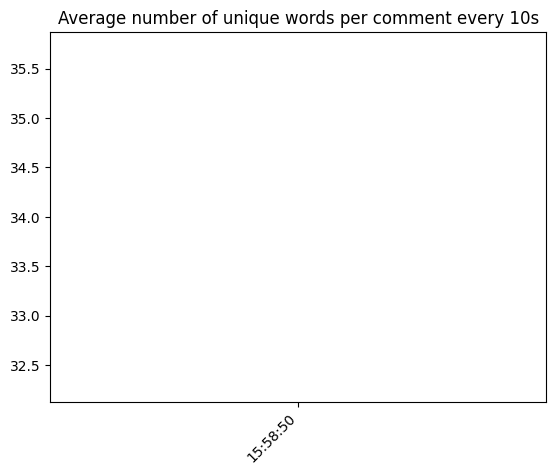

----------- 2023-12-07 15:59:00 -----------


C:\Users\marke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


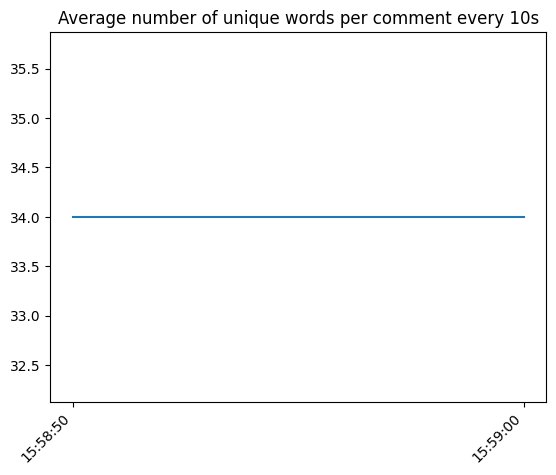

----------- 2023-12-07 15:59:10 -----------
Error: <class 'ValueError'>
----------- 2023-12-07 15:59:20 -----------
Error: <class 'ValueError'>
----------- 2023-12-07 15:59:30 -----------


C:\Users\marke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


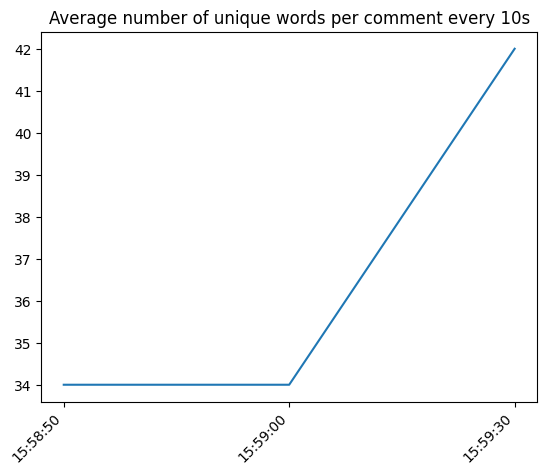

----------- 2023-12-07 15:59:40 -----------


In [7]:
ssc.start()

In [8]:
ssc.stop()